# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Data Preprocessing

### Training Image Preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    class_names=None,
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### GPU check

In [6]:
!nvidia-smi

Thu Jan 16 23:17:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   72C    P0             31W /  100W |    3954MiB /   6144MiB |     73%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break 

tf.Tensor(
[[[[205.25 201.25 215.25]
   [205.75 201.75 215.75]
   [206.5  202.5  216.5 ]
   ...
   [187.75 181.75 195.75]
   [170.25 164.25 178.25]
   [177.   171.   185.  ]]

  [[200.25 196.25 210.25]
   [204.   200.   214.  ]
   [207.25 203.25 217.25]
   ...
   [176.5  170.5  184.5 ]
   [189.75 183.75 197.75]
   [179.   173.   187.  ]]

  [[205.   201.   215.  ]
   [200.25 196.25 210.25]
   [200.25 196.25 210.25]
   ...
   [187.5  181.5  195.5 ]
   [175.25 169.25 183.25]
   [182.25 176.25 190.25]]

  ...

  [[202.25 199.25 210.25]
   [201.75 198.75 209.75]
   [201.   198.   209.  ]
   ...
   [167.25 161.25 175.25]
   [161.5  155.5  169.5 ]
   [150.   144.   158.  ]]

  [[198.75 195.75 206.75]
   [198.   195.   206.  ]
   [197.25 194.25 205.25]
   ...
   [172.75 166.75 180.75]
   [156.   150.   164.  ]
   [166.   160.   174.  ]]

  [[197.   194.   205.  ]
   [197.25 194.25 205.25]
   [198.5  195.5  206.5 ]
   ...
   [156.25 150.25 164.25]
   [160.25 154.25 168.25]
   [158.5  152.5  16

# Building Model

### To avoid Overshooting
1. Choose small learning rate by default it is 0.001 we used here 0.0001 
2. There may be chance of underfitting, so we have to increase the number of neurons from 1024 to 1500
3. Add more conv layers to extract more features/details from images, there is a possibility that our model is unable to capture relevant feature or the model is confused due to lack of feature so we have to feed it with more features
4. Add more dense layers to learn more complex features from extracted features
5. Use dropout to prevent overfitting


In [10]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layers

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25)) # avoids overfitting

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


In [20]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compile

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']
)

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [23]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 134s 57ms/step - loss: 1.3282 - accuracy: 0.6091 - val_loss: 0.6029 - val_accuracy: 0.8047
Epoch 2/10
2197/2197 [==============================] - 141s 64ms/step - loss: 0.4266 - accuracy: 0.8646 - val_loss: 0.2996 - val_accuracy: 0.9010
Epoch 3/10
2197/2197 [==============================] - 150s 68ms/step - loss: 0.2566 - accuracy: 0.9160 - val_loss: 0.2715 - val_accuracy: 0.9138
Epoch 4/10
2197/2197 [==============================] - 159s 72ms/step - loss: 0.1783 - accuracy: 0.9419 - val_loss: 0.2158 - val_accuracy: 0.9299
Epoch 5/10
2197/2197 [==============================] - 155s 70ms/step - loss: 0.1352 - accuracy: 0.9553 - val_loss: 0.2271 - val_accuracy: 0.9306
Epoch 6/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.1054 - accuracy: 0.9653 - val_loss: 0.1194 - val_accuracy: 0.9603
Epoch 7/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.0878 - accuracy: 0.9716 - val_loss: 0

## Evaluation

### 1. Evaluation on Training Set

In [24]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 49s 22ms/step - loss: 0.0407 - accuracy: 0.9878
Training accuracy: 0.9878085255622864


### 2. Evaluation on Validation Set

In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 12s 21ms/step - loss: 0.1262 - accuracy: 0.9624
Validation accuracy: 0.9623833298683167


### Save Model

#### The model should be saved in a format, h5, keras, pt ... In our case we have to save it in .keras

In [26]:
cnn.save('trained_plant_disease_model.keras')

In [27]:
training_history.history

{'loss': [1.3281816244125366,
  0.4265531003475189,
  0.2566390335559845,
  0.17832109332084656,
  0.13522858917713165,
  0.1053670272231102,
  0.0877932608127594,
  0.07196518033742905,
  0.06123169884085655,
  0.05687209591269493],
 'accuracy': [0.609090268611908,
  0.8646418452262878,
  0.9160395264625549,
  0.9419162273406982,
  0.9552884101867676,
  0.9652891159057617,
  0.9715626835823059,
  0.9761149287223816,
  0.9800839424133301,
  0.9816345572471619],
 'val_loss': [0.6028881072998047,
  0.29964467883110046,
  0.27152571082115173,
  0.2157958447933197,
  0.227076917886734,
  0.11935117095708847,
  0.1560451090335846,
  0.14084024727344513,
  0.09688032418489456,
  0.12624356150627136],
 'val_accuracy': [0.8047462105751038,
  0.901035726070404,
  0.9137833118438721,
  0.9298884868621826,
  0.9306282997131348,
  0.9602777361869812,
  0.9543023109436035,
  0.9588549733161926,
  0.9704643487930298,
  0.9623833298683167]}

### Recording The History

In [28]:
import json
with open("training_history.json", "w") as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

In [29]:
training_history.history['accuracy']

[0.609090268611908,
 0.8646418452262878,
 0.9160395264625549,
 0.9419162273406982,
 0.9552884101867676,
 0.9652891159057617,
 0.9715626835823059,
 0.9761149287223816,
 0.9800839424133301,
 0.9816345572471619]

In [30]:
training_history.history['val_accuracy']

[0.8047462105751038,
 0.901035726070404,
 0.9137833118438721,
 0.9298884868621826,
 0.9306282997131348,
 0.9602777361869812,
 0.9543023109436035,
 0.9588549733161926,
 0.9704643487930298,
 0.9623833298683167]

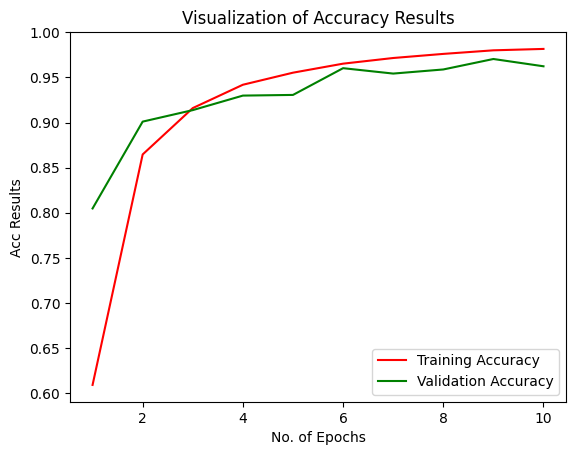

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label="Training Accuracy")
plt.plot(epochs, training_history.history['val_accuracy'], color='green', label="Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Acc Results")
plt.title("Visualization of Accuracy Results")
plt.legend()
plt.show()

## Other Metrics

In [32]:
# dataset classes
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
# we will define a test set from the valid set, because the test directory is showing images from outside the project, to be tested on the real machinne not trainign phase.
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 17572 files belonging to 38 classes.


In [34]:
y_pred = cnn.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 12s 22ms/step


(array([[1.0000000e+00, 3.7310176e-11, 1.0515727e-12, ..., 1.0270252e-19,
         4.5520845e-18, 9.7834483e-17],
        [1.0000000e+00, 1.6009512e-08, 1.3384721e-11, ..., 1.5782091e-16,
         1.0824676e-14, 3.7502689e-14],
        [1.0000000e+00, 8.8560588e-13, 1.3953060e-13, ..., 7.7006841e-23,
         2.2726857e-20, 3.3691712e-18],
        ...,
        [5.7009908e-10, 4.3370335e-11, 9.4252366e-09, ..., 1.5682465e-10,
         7.7019245e-11, 9.9999869e-01],
        [6.4295395e-11, 3.1106475e-14, 1.3854739e-11, ..., 3.4356290e-14,
         8.1513782e-14, 1.0000000e+00],
        [1.4305233e-14, 9.5632021e-16, 8.7817118e-13, ..., 4.6403133e-16,
         1.9723374e-13, 1.0000000e+00]], dtype=float32),
 (17572, 38))

##### based on these results, the probability of each disease is shown in the array, so what we will do now, is to choose the most highest prob. and choose it as a class. These are 38 classes probability for each image.

In [35]:
predicted_categories = tf.argmax(y_pred, axis= 1)


In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_cat = tf.concat([y for x,y in test_set], axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_cat, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

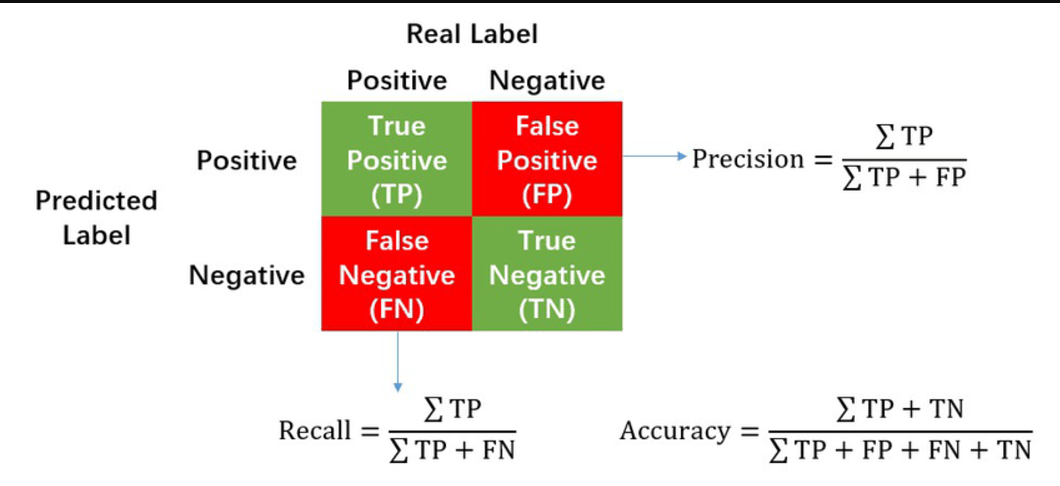

In [39]:
# to calculate the recall and the precision we have to use the scikit-learn
from sklearn.metrics import classification_report

classification_report = classification_report(Y_true, predicted_categories, target_names=class_name)
print(classification_report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.94      0.95       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.97       440
                                   Apple___healthy       0.98      0.98      0.98       502
                               Blueberry___healthy       0.97      0.94      0.95       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.90      0.95       421
                 Cherry_(including_sour)___healthy       0.99      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [40]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[476,   8,   0, ...,   0,   0,   0],
       [  0, 489,   0, ...,   0,   0,   0],
       [  0,   0, 415, ...,   2,   0,   0],
       ...,
       [  0,   0,   0, ..., 481,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 478]], dtype=int64)

In [44]:
cm.shape

(38, 38)

## Confusion Matrix

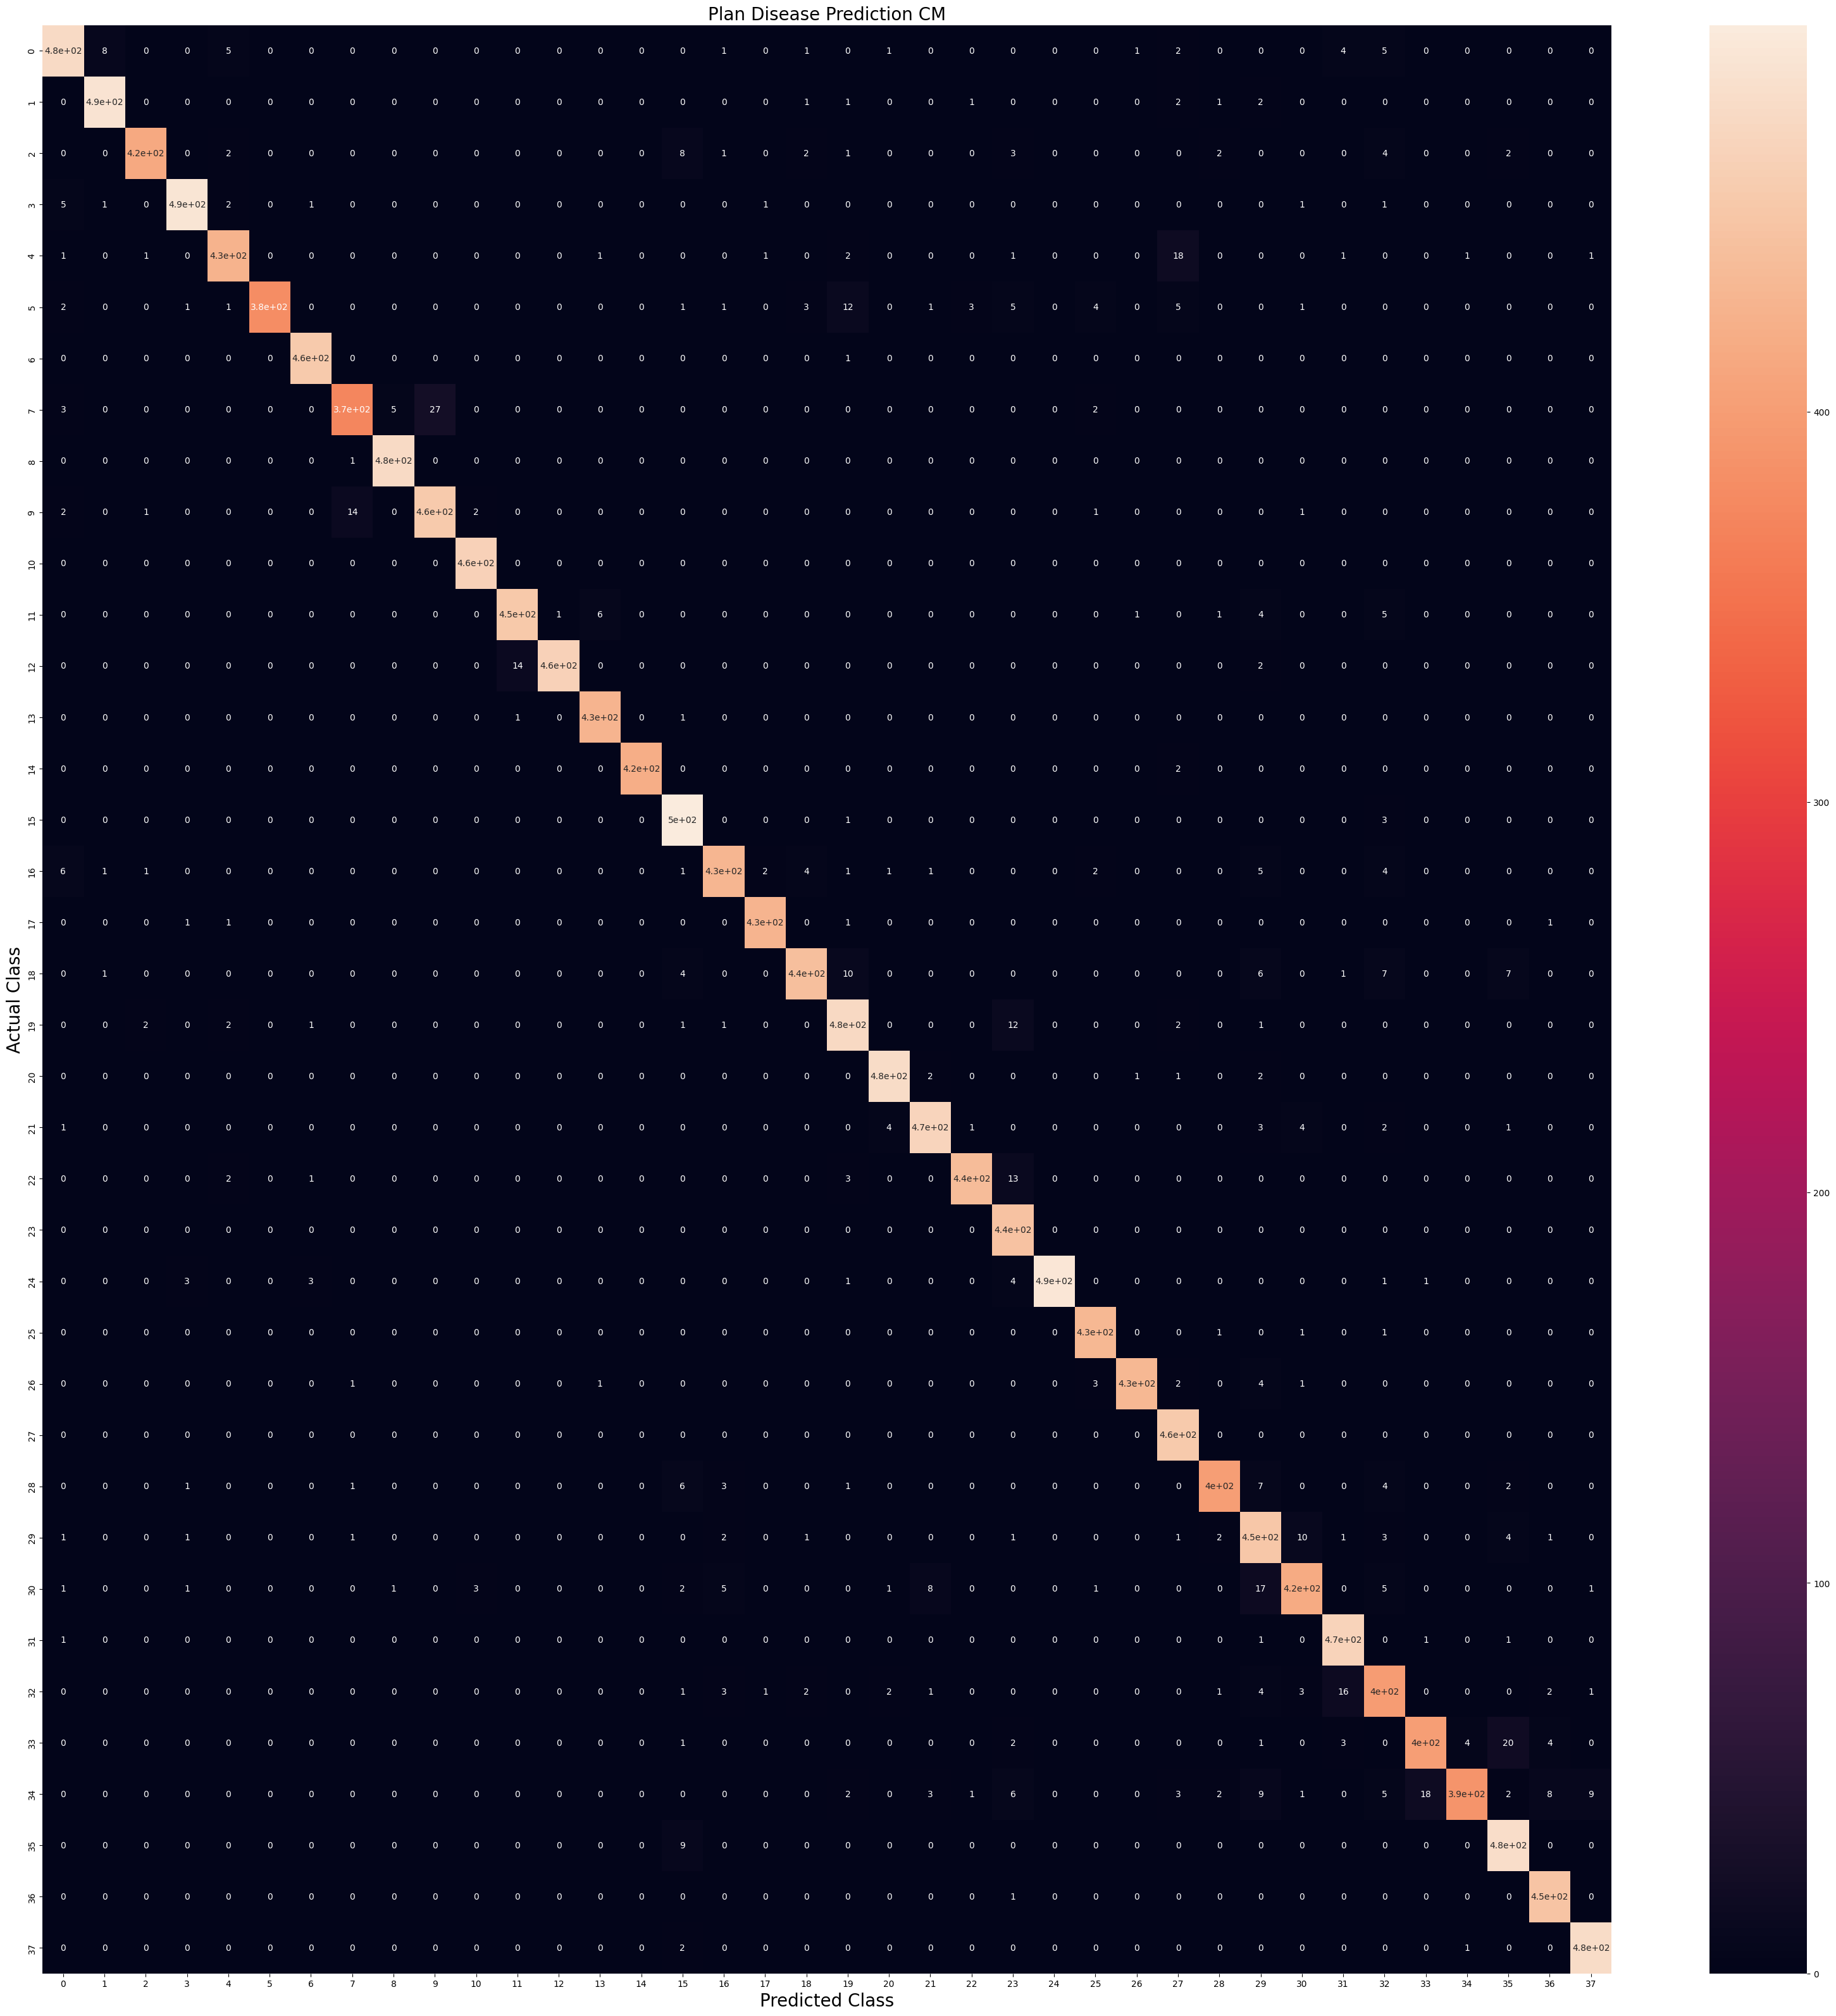

In [54]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws= {"size": 10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plan Disease Prediction CM", fontsize=20)
plt.show()

we can color the heatmap to be more clear, using the attributes. 
we changed the size, to show the small values written in each cell.